# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [6]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [7]:
fitbit = pd.read_csv('../data/Fitbit2.csv')

In [46]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,minutes_sedentary,minutes_lightly_active,Minutes Fairly Active,minutes_very_active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [9]:
# AVERAGE STEPS BY MONTH_ENCODED
# Agrupo por meses y se calcula la media de cada mes. 
meses = fitbit.groupby("Months_encoded").agg({"Steps":"mean"})
meses

,Steps
Months_encoded,
1,9892.064516
2,8922.866667
3,10312.935484
4,13079.033333
5,10620.096774
6,12536.166667
7,9193.322581
8,11584.774194
9,9191.333333


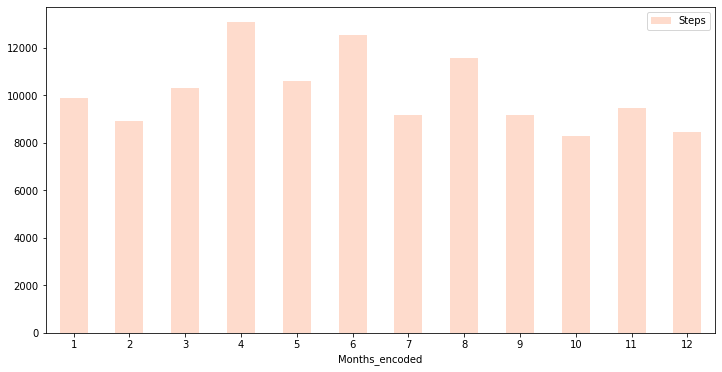

In [45]:
# Gráfico hecho con matplotlib
meses.plot(kind="bar", )
plt.xticks(rotation = 360);
# Los meses que más pasos se han dado han sido abril y junio. Se aprecia una cierta estacionalidad;
# los meses de verano la gente da más pasos, se anima más a ir caminando a sus destinos.

In [11]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
semana = fitbit.groupby("Work_or_Weekend").agg({"Steps":"mean"})
semana

,Steps
Work_or_Weekend,
0,10064.238095
1,10144.572519


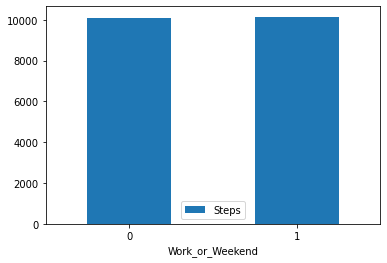

In [12]:
# Se realiza el gráfico con matplotlib
semana.plot(kind="bar")
plt.xticks(rotation = 360);
# En este caso, se ha calculado la media por los pasos dados entre semana y el fin de semana 
# y arroja unos datos prácticamente iguales.

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [13]:
#Hay que cambiar el nombre de las columnas con espacios
fitbit = fitbit.rename(columns={'Minutes Lightly Active':'minutes_lightly_active',
                               'Minutes Very Active': 'minutes_very_active',
                               'Minutes Sedentary':'minutes_sedentary'})


In [14]:
# Creo un nuevo dataframe par poder hacer el loop:
fitbitvs2 = fitbit[["Steps","minutes_lightly_active", "minutes_very_active", 'minutes_sedentary']]
fitbitvs2

,Steps,minutes_lightly_active,minutes_very_active,minutes_sedentary
0,905,46,0,1.355
1,18925,316,60,611.000
2,14228,226,77,602.000
3,6756,190,4,749.000
4,502,171,0,876.000
...,...,...,...,...
362,18588,275,79,599.000
363,16382,333,55,684.000
364,21913,287,90,701.000
365,19023,298,85,575.000


In [15]:
list(enumerate(fitbitvs2))

[(0, 'Steps'),
 (1, 'minutes_lightly_active'),
 (2, 'minutes_very_active'),
 (3, 'minutes_sedentary')]

In [16]:
# for i in enumerate(fitbitvs2):
    #plt.subplot(1,3,i[0]+1)
    #sns.countplot(i[1], data = fitbitvs2)
    
## No ha salido 

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [17]:
titanic = pd.read_csv('../data/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [18]:
# Vemos las primeras líneas del df para hacernos una idea de lo que contiene.
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


In [19]:
#Verificamos que está cargado como un data frame
type(titanic)

pandas.core.frame.DataFrame

In [20]:
# Vemos qué tipo de variables contiene:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [21]:
# NUMERICAL VARIABLES
(titanic.select_dtypes(include=np.number)).head()
# Las siguientes variables son numéricas (int o float): Passengerld, Survived, Pclass, Age, SibSp, Parch and Fare

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [22]:
# CATEGORICAL VARIABLES
# Variables no numéricas que adquieren valores de un número limitado de clases o categorías.
(titanic.select_dtypes(include='object')).head()
# En este caso, de las variables tipo 'object', las que serían categóricas serían 'Gender' y 'Embarked'

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [47]:
plt.rcParams["figure.figsize"] = (12,6)

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

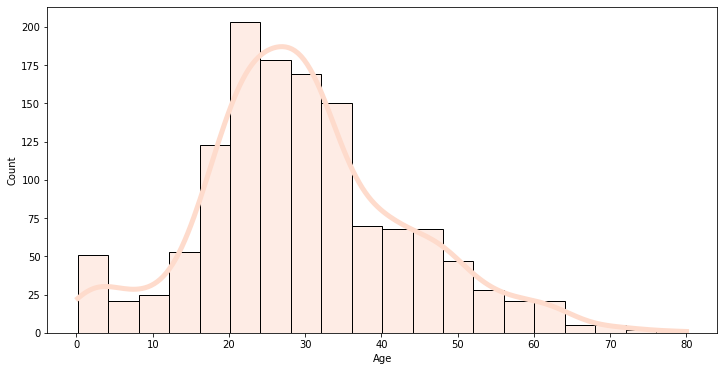

In [68]:
# Creo un historgrama donde se observa que las edades más presentes entre los pasajeros están comprendidas entre 20 y 35 años.
# Se añade también la línea de destibución.
sns.histplot(x=titanic.Age, bins = 20, kde = True, 
            line_kws={'lw': 5, 'ls': '-'})

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

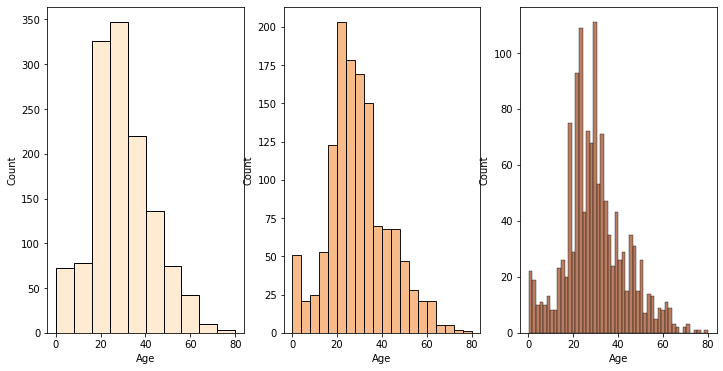

In [26]:
figura, eje = plt.subplots(nrows=1, ncols=3, sharex = True)
sns.histplot(data = titanic, x = "Age", ax = eje[0], color="bisque", bins=10)
sns.histplot(data = titanic, x = "Age", ax = eje[1], color="sandybrown", bins=20)
sns.histplot(data = titanic, x = "Age", ax = eje[2], color="sienna", bins=50);

#### How does the bin size affect your plot?

In [27]:
"""
A mayor bin, mayor detalle de los grupos de edad en el histograma. 
En este caso, con un bin = 10 no queda bien definida la edad de cada barra.
y con un bin = 50 es difícil precisar la edad debido al tamaño tan pequeño del gráfico.
En mi opinión lo más sencillo para que alguien que no ha hecho el gráfico lo entendiera, sería poner un bin = 15, 
    de esta manera cada barra respresentaría un grupo de edad que fuera de 5 en 5.
"""

'\nA mayor bin, mayor detalle de los grupos de edad en el histograma. \nEn este caso, con un bin = 10 no queda bien definida la edad de cada barra.\ny con un bin = 50 es difícil precisar la edad debido al tamaño tan pequeño del gráfico.\nEn mi opinión lo más sencillo para que alguien que no ha hecho el gráfico lo entendiera, sería poner un bin = 15, \n    de esta manera cada barra respresentaría un grupo de edad que fuera de 5 en 5.\n'

#### Use seaborn to show the distribution of column `Age`.

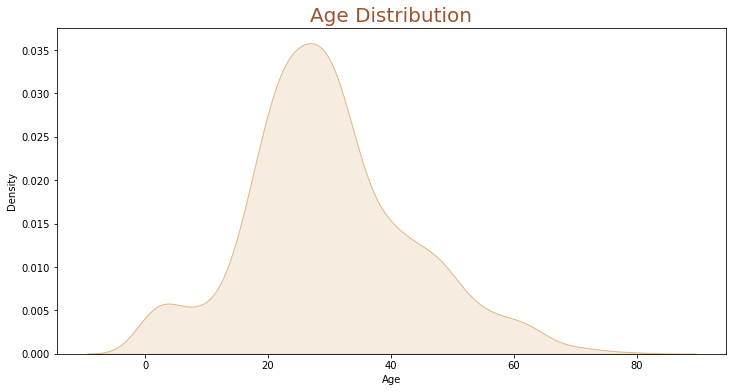

In [28]:
sns.kdeplot(x=titanic.Age, fill=True, color="burlywood")
plt.title("Age Distribution", size = 20, color = "sienna");

In [ ]:
# Como en los gráficos anteriores, se ve que donde más densidad de personas hay es entre los 20 y 40 años. 

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [29]:
# Para visualizar la columna Gender, voy a relacionarlo con la variable Age para hacer algo diferente del anterior ejercicio.
# Voy a hacer un histograma horizontal 

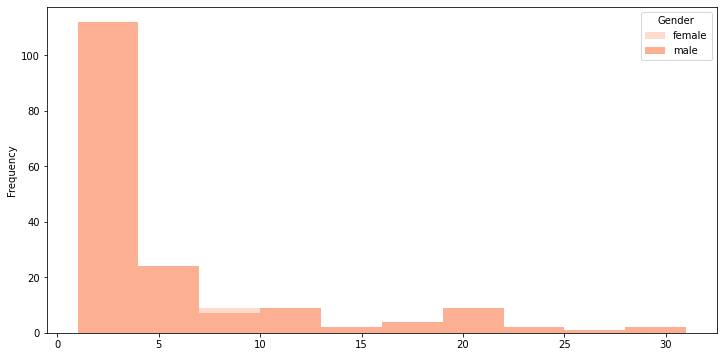

In [71]:
# Method 1 - matplotlib
titanic.groupby(["Age", "Gender"])["Gender"].count().unstack().plot(kind="hist");
# Con matplotlib no sé separar las columnas de female y male! 

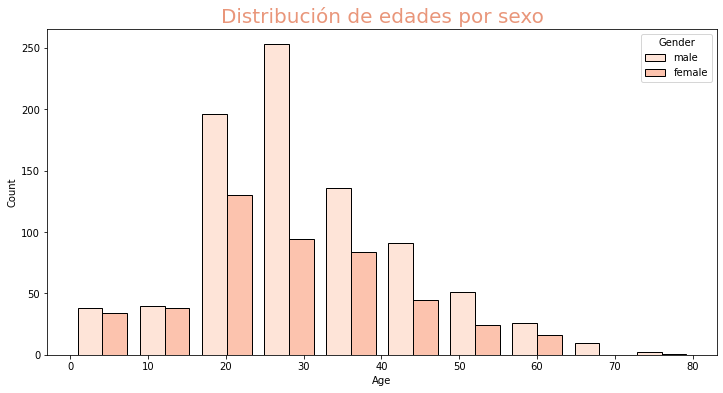

In [31]:
# Method 2 - seaborn
sns.set_palette('Reds')
sns.histplot(data = titanic, x = "Age", hue="Gender", multiple ="dodge", bins=10, shrink=.8)
plt.title("Distribución de edades por sexo", size = 20, color = "darksalmon");

In [ ]:
# Con seaborn se ven los resultados de forma más clara. 
# los pasajeros más abundantes son los hombres entre 20 y 30 años. Parte de ellos podrían ser personal de todo el barco.

#### Use the right plot to visualize the column `Pclass`.

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

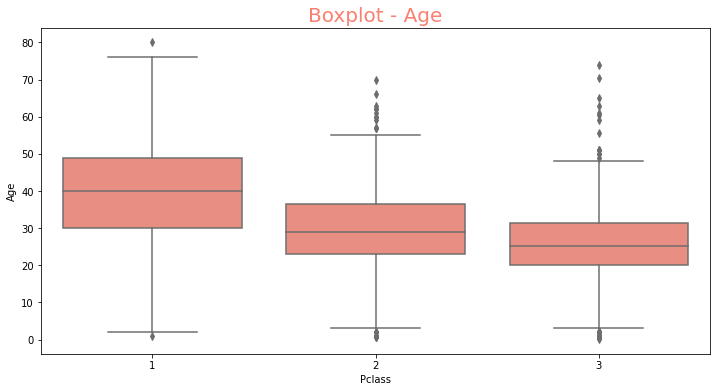

In [32]:
sns.boxplot(x="Pclass", y ="Age", data =titanic, color="salmon")
plt.title("Boxplot - Age", size=20, color="salmon");

In [33]:
"""
El boxplot nos da datos como la mediana y los percentiles, así como los outliers y el rango intercuartílico.
En primera clase la mediana (el valor de la posición central en un conjunto de datos ordenados) sería 40 años, 
en segunda clase sería 30 años y en tercera clase 25 años aproximadamente.

En primera clase el 50% de los datos obtenidos tienen una edad comprendida entre 30 y casi 50 años (vendría a ver el Q1 y Q3)
Y cabe destacar también un outlier que se situa en los 80 años de edad. Es un valor atípico en toda la muestra.

En tercera clase, por ejemplo, el 50% de las personas incluidas en la muestra tienen edades entre 20 y casi 30 años, 
pero sin embargo, hay más outliers (con edades desde los 50 hasta pasados los 70).

Por último, los bigotes representan los rangos del 25 % de valores de datos de la parte inferior y el 25 % de la parte inferior.
En este caso, vemos que en primera clase estos bigotes son más extensos, 
mientras que van disminuyendo en la segunda y en la tercer clase.

"""

'\nyour comments here\n'

#### What does the last plot tell you about the feature `Age`?

In [34]:
"""
El boxplot nos puede decir acerca de la edad que, a mayor edad, más poder adquisitivo y más posibilidad de viajar 
en primera clase hay. Este comentario se refuerza con el boxplot de de segunda clase, donde la edad cae significativamente y 
en tercera clase, donde se observa que la edad es todavía más baja. 

"""

'\nyour comments here\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

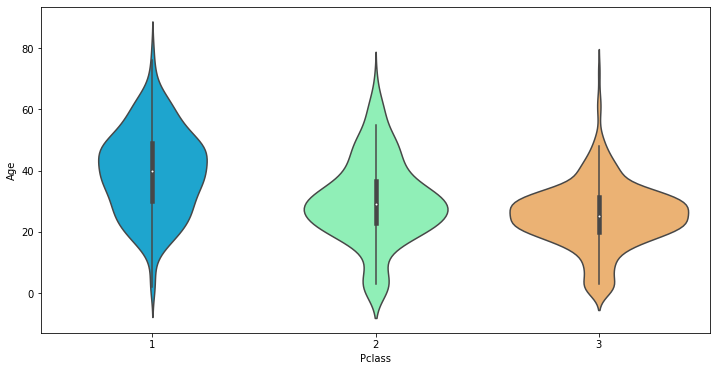

In [35]:
sns.violinplot(x="Pclass", y="Age", data = titanic, palette = "rainbow")

#### What additional information does the last plot provide about feature `Age`?

In [36]:
"""
Nos da la misma información que el boxplot agregando el dato de la densidad. 
En primera clase, la edad está más dispersa, mientras que en segunda y tercera clase la edad está más concentrada.
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

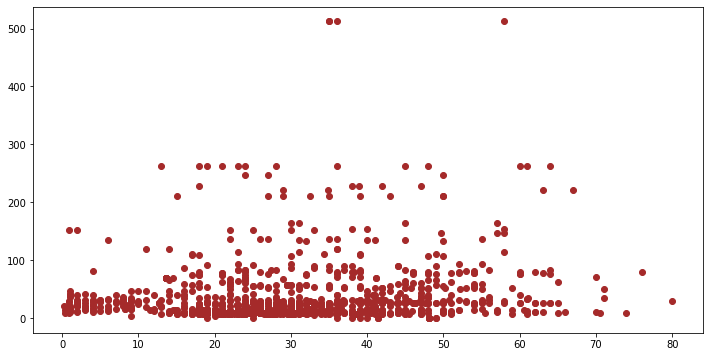

In [37]:
# Method 1 - matplotlib
plt.scatter(x=titanic.Age, y=titanic.Fare, color="brown");

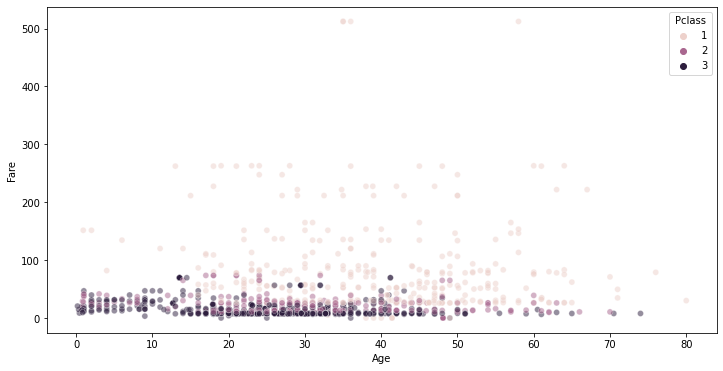

In [73]:
# Method 2 - seaborn
sns.scatterplot(x="Age", y = "Fare", data =titanic, alpha=0.5, sizes=(20,200), color = "brown", hue = "Pclass");

In [ ]:
''' 
La relación existente que hay entre el precio y la edad es que hasta los 45 años las tarifas suelen ser muy similares.
En todos los rangos de edad hay algunos casos (que son minoría) que han pagado precios superiores. Estos casos coindicen
en que todos son de primera clase. 
'''

#### Plot the correlation matrix using seaborn.

In [39]:
correlation = titanic.corr()
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


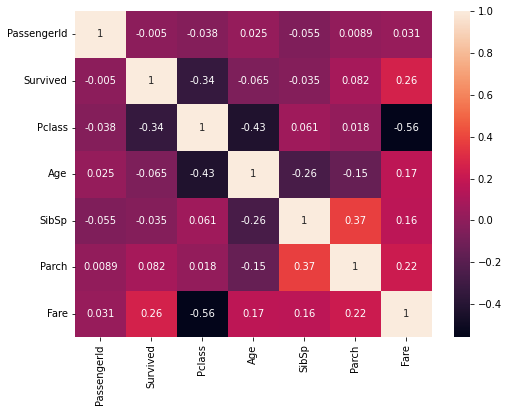

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True);

#### What are the most correlated features?

In [41]:
"""
Las variables que aparecen correlacionadas negativamente son 'Fare' y 'Pclass' 
Y las variables que más correlacionadas están entre si de forma positiva son 'Sibsp' y 'Parch'
"""

'\nyour comments here\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

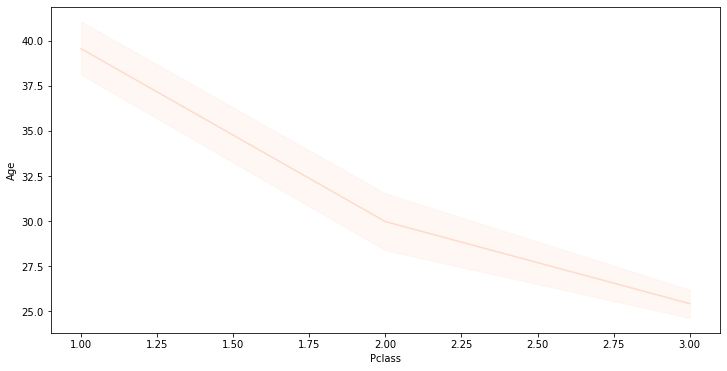

In [42]:
sns.lineplot(data=titanic, x="Pclass", y = "Age");

In [ ]:
# A mejor clase - mayor edad y viceversa.

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

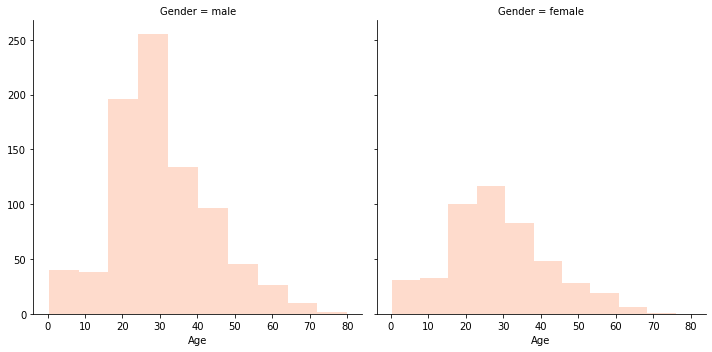

In [43]:
g = sns.FacetGrid(titanic, col="Gender", height=5)
g.map(plt.hist, "Age");

In [ ]:
'''
En este caso, dice lo similar a otros gráficos comentados anteriormente; en general, hay más hombres que mujeres 
sobre todo en entre los 20 y (casi) 40 años.
''' 